<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Logistic_Regression(Part_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The Perceptron Algorithm

The term 'perceptron technique' isn't standard in logistic regression. However, it's possible you're referring to the **Perceptron algorithm** itself, or how the *concept of a perceptron* (a fundamental building block of neural networks) relates to the decision boundary in logistic regression. Let me clarify both:

The Perceptron is one of the oldest and simplest supervised learning algorithms, primarily used for binary classification. It's a linear classifier that learns a decision boundary to separate data points into two classes. It was originally developed in the late 1950s by Frank Rosenblatt, inspired by the structure of the human brain.

**How it works (simplified):**
1.  **Inputs:** It takes a vector of input features (`x`) and a corresponding vector of weights (`w`). A bias term (`b`) is also included.
2.  **Weighted Sum:** It calculates a weighted sum of the inputs: `z = w₀x₀ + w₁x₁ + ... + wₙxₙ + b`.
3.  **Activation Function:** This sum `z` is then passed through a step function (a simple threshold function) to produce an output (e.g., 1 if `z > 0`, and 0 or -1 otherwise).
4.  **Learning:** If the perceptron misclassifies an example, its weights are updated based on the error, iteratively adjusting the decision boundary until all training examples are correctly classified (if they are linearly separable).

### Relationship to Logistic Regression

While both the Perceptron and Logistic Regression are linear classifiers, they have key differences:

*   **Output:**
    *   The **Perceptron** outputs a *hard classification* (e.g., 0 or 1) directly using a step function.
    *   **Logistic Regression** outputs a *probability* (a value between 0 and 1) that an instance belongs to a particular class, using the **sigmoid (logistic) function** as its activation function. This probability can then be thresholded (e.g., if probability > 0.5, classify as 1) to get a hard classification.

*   **Optimization/Learning:**
    *   The **Perceptron algorithm** updates weights only when a misclassification occurs, and it guarantees convergence only for linearly separable data.
    *   **Logistic Regression** uses an optimization algorithm (like Gradient Descent) to minimize a *cost function* (typically cross-entropy loss) over all training examples, regardless of whether they are misclassified. This makes it more robust to noisy data and allows it to work with non-linearly separable data by finding the best linear approximation.

*   **Decision Boundary:** Both create a linear decision boundary. The perceptron finds *any* such boundary that separates the classes, while logistic regression finds the boundary that best separates the classes in a probabilistic sense.

So, if you're thinking about the 'perceptron technique' in the context of logistic regression, you might be considering the similarity in their linear weighted sum calculation (`z = w⋅x + b`) or how they both define a linear decision boundary. However, the *activation function* and *learning rule* are distinct, making logistic regression a more sophisticated and widely used method for probability estimation and classification.

The **sigmoid function**, also known as the **logistic function**, is a crucial component of logistic regression. It's an S-shaped curve that maps any real-valued number into a value between 0 and 1.

Here's why it's used in logistic regression:

1.  **Probability Output:** In classification tasks, we often want to predict the *probability* that an instance belongs to a certain class. The sigmoid function takes the linear combination of inputs and weights (often called the 'logit' or 'score') and transforms it into a probability. A value of 0.5 can be used as a threshold: if the output is above 0.5, classify as one class; if below, as the other.

2.  **Mathematical Form:** The sigmoid function is defined as:
    ```
    σ(z) = 1 / (1 + e^(-z))
    ```
    where `z` is the linear combination of features and weights (`z = w₀x₀ + w₁x₁ + ... + wₙxₙ + b`).

3.  **Interpretation:**
    *   As `z` approaches positive infinity, `e^(-z)` approaches 0, so `σ(z)` approaches 1.
    *   As `z` approaches negative infinity, `e^(-z)` approaches positive infinity, so `σ(z)` approaches 0.
    *   When `z = 0`, `σ(z) = 1 / (1 + e^0) = 1 / (1 + 1) = 0.5`.

4.  **Why not a simple step function?** While a simple step function (like in the Perceptron) gives a hard classification, it's not differentiable, which makes it difficult to use with gradient-based optimization algorithms (like gradient descent) that logistic regression relies on to find the best weights. The sigmoid function is continuous and differentiable, allowing for efficient training.

In essence, the sigmoid function converts the output of a linear model into a probability, making logistic regression suitable for binary classification problems where the goal is to estimate the likelihood of an event occurring.

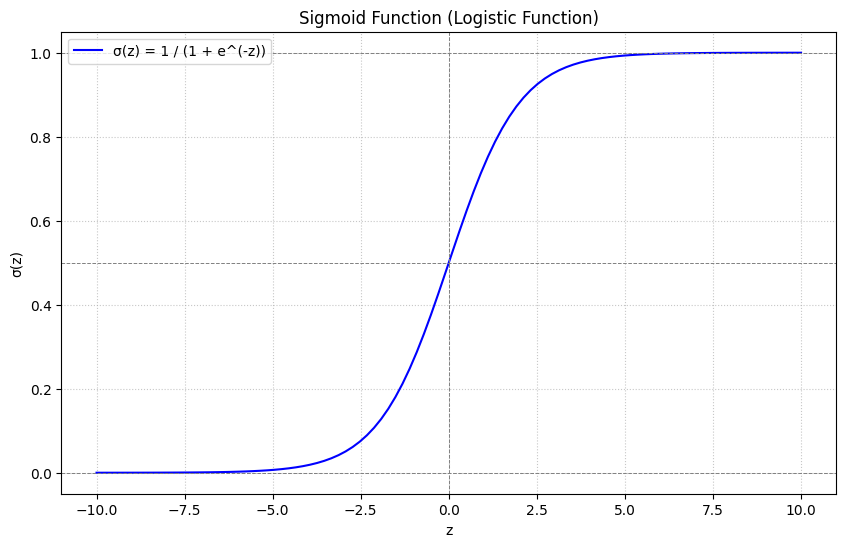

In [217]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate a range of z values
z = np.linspace(-10, 10, 100)

# Calculate the corresponding sigmoid values
s_z = sigmoid(z)

# Plot the sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(z, s_z, label='σ(z) = 1 / (1 + e^(-z))', color='blue')
plt.title('Sigmoid Function (Logistic Function)')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7) # Add line at z=0
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.7) # Add line at σ(z)=0.5
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axhline(1, color='gray', linestyle='--', linewidth=0.7)
plt.grid(True, linestyle=':', alpha=0.7)
plt.legend()
plt.show()

### The Sigmoid Function's Impact on Logistic Regression: `y_i`, `y_i^`, and Error

In logistic regression, the sigmoid function plays a pivotal role in transforming the model's linear output into a probability, which is crucial for binary classification and for defining the model's error.

Let's break down the terms you mentioned:

1.  **`y_i` (Actual Label):**
    *   This represents the true, observed class label for a given data point `i`. For binary classification, `y_i` can only be **0** or **1**.

2.  **`z` (Linear Combination/Logit):**
    *   Before the sigmoid function, logistic regression first calculates a linear combination of the input features (`x`) and their corresponding weights (`w`), plus a bias term (`b`):
    ```
    z = w₀x₀ + w₁x₁ + ... + wₙxₙ + b
    ```
    *   This `z` can range from negative infinity to positive infinity.

3.  **`y_i^` (Predicted Probability):**
    *   This is where the **sigmoid function** comes in. The `z` value is passed through the sigmoid function to produce `y_i^` (often denoted as `p_i` or `h_θ(x)`).
    ```
    y_i^ = σ(z) = 1 / (1 + e^(-z))
    ```
    *   The sigmoid function squashes any real-valued `z` into a value between 0 and 1, which can be directly interpreted as the **predicted probability** that the instance `i` belongs to class 1 (i.e., `P(Y=1|X=x_i)`).
    *   For example, if `y_i^` is 0.8, the model predicts an 80% chance that the instance belongs to class 1.

4.  **`y_i - y_i^` (Error/Residual Interpretation):**
    *   While `y_i - y_i^` intuitively represents the difference between the actual and predicted values, in logistic regression, this exact term is not typically used directly as the *cost* for a single data point. Instead, it appears prominently in the *gradient* of the cost function.
    *   **Cost Function:** Logistic regression uses a specialized cost function, typically **Binary Cross-Entropy Loss** (also known as Log Loss), which is designed to penalize incorrect probability predictions more severely. For a single training example, the loss `L(y_i, y_i^)` is:
    ```
    L(y_i, y_i^) = - [y_i * log(y_i^) + (1 - y_i) * log(1 - y_i^)]
    ```
    *   The overall cost function for the model is the average of these individual losses over all training examples.
    *   **Gradient Calculation:** When performing gradient descent to update the model's weights and bias, the derivative of the cost function with respect to the weights often simplifies to terms involving `(y_i^ - y_i)` or `(y_i - y_i^)`:
    ```
    ∂L/∂w_j = (y_i^ - y_i) * x_{i,j}
    ∂L/∂b  = (y_i^ - y_i)
    ```
    *   This `(y_i^ - y_i)` term effectively tells the model how much and in what direction to adjust the weights to reduce the error. If `y_i^` is too high (e.g., predicted 0.9 when actual is 0), then `(0.9 - 0)` is positive, indicating that the weights should be adjusted to decrease `y_i^`. If `y_i^` is too low (e.g., predicted 0.2 when actual is 1), then `(0.2 - 1)` is negative, indicating weights should be adjusted to increase `y_i^`.

### Why the Sigmoid is Essential for this Error Calculation:

1.  **Differentiability:** Unlike a simple step function (which outputs 0 or 1 directly and is not differentiable), the sigmoid function is continuous and differentiable across its entire domain. This differentiability is absolutely critical because **gradient descent requires calculating derivatives** to find the optimal weights that minimize the cost function.
2.  **Meaningful Probabilities:** By providing a continuous probability score between 0 and 1, the sigmoid function allows the cost function to penalize predictions based on their **degree of error**, not just whether they are right or wrong. Predicting 0.51 when the true label is 0 is a much smaller error than predicting 0.99 when the true label is 0.

In summary, the sigmoid function transforms the linear output `z` into a probabilistic prediction `y_i^`. This `y_i^` is then compared against the actual label `y_i` using a differentiable cost function (like cross-entropy), and the term `(y_i^ - y_i)` becomes a crucial component in calculating the gradients that guide the model's learning process.

#Program 1

In [218]:
import numpy as np
import matplotlib.pyplot as plt

In [219]:
# X=hours studied
X=np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1)

# y=pass(1)/ fail(0)
y=np.array([0,0,0,0,0,0,1,1,1,1])




In [220]:
#Sigmoid function

def sigmoid(z):
  return 1/(1+np.exp(-z))

w=0.0
b=0.0
lr=0.1
epochs=50

errors_history=[]
pred_history=[]



In [221]:
for epochs in range(epochs):

  #Linear output
  z=w* X+b

  #predicted probabilty
  y_hat=sigmoid(z)

  #error
  error=y.reshape(-1,1)-y_hat

  #Store mean error
  errors_history.append(np.mean(np.abs(error)))
  pred_history.append(y_hat)

  #Gradient descent
  dw=np.mean(error*X)
  db=np.mean(error)

  #update weights
  w=w+lr*dw
  b=b+lr*db

print("Final Weight:",w)
print("Final Bias:",b)



Final Weight: 0.1878094163509539
Final Bias: -0.8297167218289633


This code implements a basic **logistic regression training loop** using gradient descent. Here's a breakdown:

1.  **`for epochs in range(epochs):`**
    *   This loop iterates a specified number of times (`epochs`, which was set to 50 previously). Each iteration is called an "epoch," and during each epoch, the model processes the entire training dataset once to update its weights.

2.  **`z = w * X + b`**
    *   This calculates the `linear output` (often called the "logit" or "score"). It's the weighted sum of the input features (`X`) and the current `weights (w)` plus the `bias (b)`. This is the linear part of the logistic regression model.

3.  **`y_hat = sigmoid(z)`**
    *   The linear output `z` is then passed through the `sigmoid function` (which you defined earlier). The sigmoid function transforms `z` into a value between 0 and 1, which represents the `predicted probability` (`y_hat`) that the input `X` belongs to the positive class (class 1).

4.  **`error = y.reshape(-1,1) - y_hat`**
    *   This calculates the `error` for each data point. It's the difference between the `actual label (y)` (reshaped to match the dimensions of `y_hat`) and the `predicted probability (y_hat)`. A positive error means `y_hat` was too low, and a negative error means `y_hat` was too high.

5.  **`errors_history.append(np.mean(np.abs(error)))`**
    *   This line stores the `mean absolute error` for the current epoch. It gives you an idea of how well the model is performing and how the error changes over time during training.

6.  **`pred_history.append(y_hat)`**
    *   This stores the `predicted probabilities` for all data points at the end of each epoch. This can be useful for visualizing the evolution of predictions.

7.  **`dw = np.mean(error * X)`**
    *   This calculates the `gradient` of the cost function with respect to the `weight (w)`. In a simple logistic regression with a binary cross-entropy loss, the derivative with respect to `w` involves `(y_hat - y)` multiplied by `X`. Here, `error` is `y - y_hat`, so `error * X` gives a similar direction for the gradient. The `np.mean()` averages this gradient across all data points.

8.  **`db = np.mean(error)`**
    *   This calculates the `gradient` of the cost function with respect to the `bias (b)`. Similarly, the derivative with respect to `b` involves `(y_hat - y)`. Averaging `error` across all data points gives the mean gradient for the bias.

9.  **`w = w + lr * dw`**
    *   This `updates the weight (w)`. `lr` (learning rate) controls the size of the step taken in the direction of the gradient. We add `lr * dw` to `w` to move `w` in a direction that reduces the error (since `dw` is derived from `y - y_hat`).

10. **`b = b + lr * db`**
    *   This `updates the bias (b)` in the same way as the weight, using its respective gradient `db` and the learning rate `lr`.

11. **`print("Final Weight:",w)`** and **`print("Final Bias:",b)`**
    *   After the training loop completes, these lines print the `final learned values` for the weight and bias, which define the decision boundary of your logistic regression model.

Sigmoid Curve

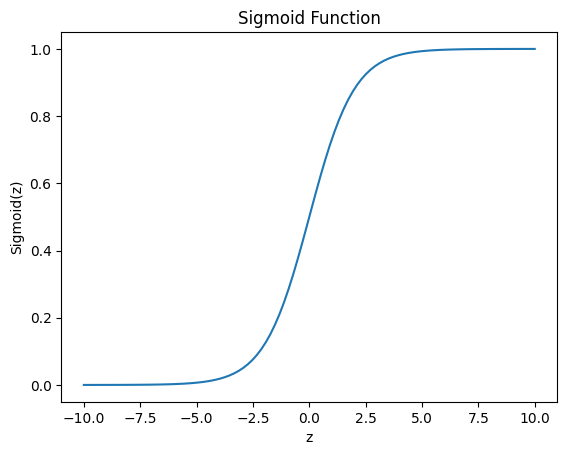

In [222]:
z_values = np.linspace(-10, 10, 100)
sig_values = sigmoid(z_values)

plt.figure()
plt.plot(z_values, sig_values)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.show()


Final Predictions

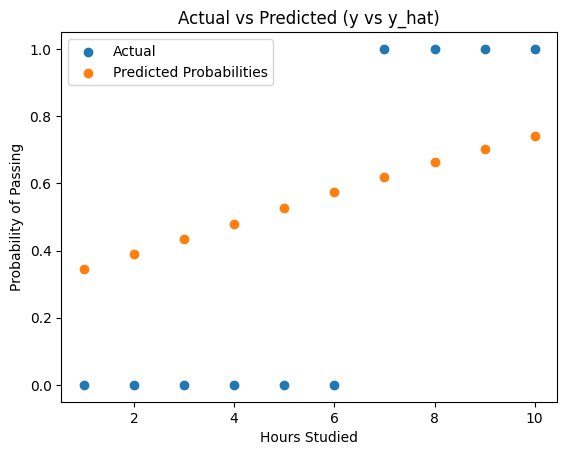

In [223]:
# Final predictions
z_final = w * X + b
y_final = sigmoid(z_final)

plt.figure()
plt.scatter(X, y, label="Actual")
plt.scatter(X, y_final, label="Predicted Probabilities")
plt.title("Actual vs Predicted (y vs y_hat)")
plt.xlabel("Hours Studied")
plt.ylabel("Probability of Passing")
plt.legend()
plt.show()


Error (yi − y^i)

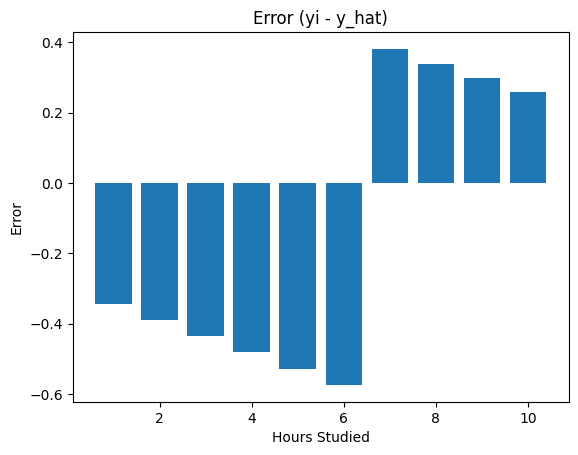

In [224]:
error_final = y.reshape(-1,1) - y_final

plt.figure()
plt.bar(X.flatten(), error_final.flatten())
plt.title("Error (yi - y_hat)")
plt.xlabel("Hours Studied")
plt.ylabel("Error")
plt.show()


Error Decreasing Over Time

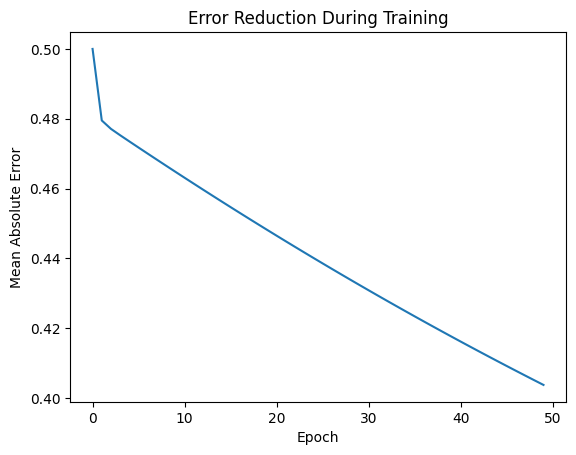

In [225]:
plt.figure()
plt.plot(errors_history)
plt.title("Error Reduction During Training")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Error")
plt.show()


#Important Program

In [226]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_informative=2,
    n_redundant=0,
    random_state=41,
    class_sep=2
)

In [227]:
import matplotlib.pyplot as plt


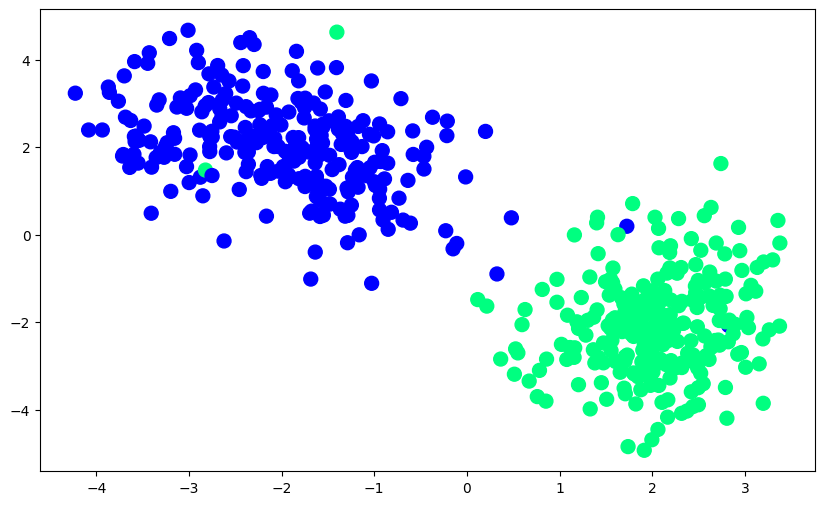

In [228]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:,1],c=y,cmap='winter',s=100)
plt.show()

# 1 Using Perceptron Function

In [229]:
def perceptron(X,y):

  X=np.insert(X,0,1,axis=1)
  w=np.ones(X.shape[1])
  lr=0.1

  for i in range(1000):
    j=np.random.randint(0,100)
    y_hat=step(np.dot(w,X[j]))
    w=w + lr*(y[j]-y_hat)*X[j]
  return w[0],w[1:]

In [230]:
def step(z):
  return 1 if z > 0 else 0

In [231]:
intercept_,coef=perceptron(X,y)

In [232]:
print(intercept_)

-0.19999999999999987


In [233]:
print(coef)

[ 0.45795535 -0.33356991]


In [234]:
m=-(coef[0]/coef[1])
b=-(intercept_/coef[1])

In [235]:
X_input=np.linspace(-3,3,100)
y_input=m*X_input + b

(-3.0, 2.0)

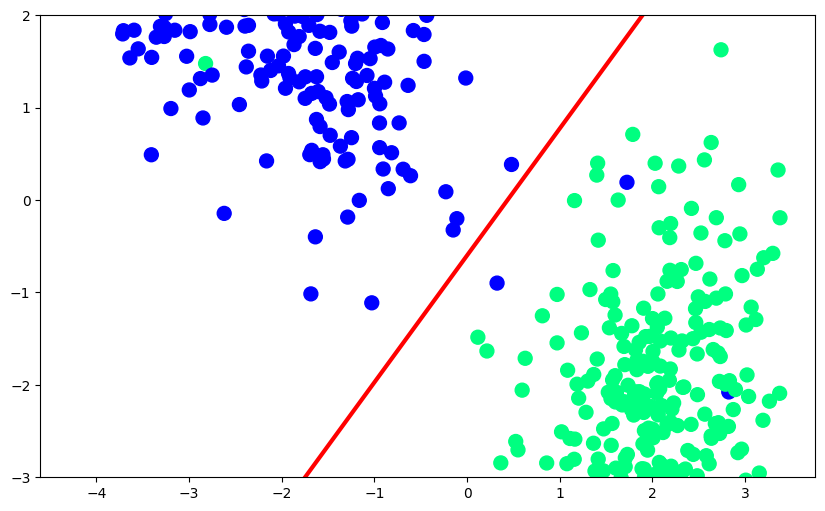

In [236]:
plt.figure(figsize=(10, 6))
plt.plot(X_input,y_input,color='red',linewidth=3,label='Decision Boundary')
plt.scatter(X[:, 0], X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [237]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X,y)

LogisticRegression()

In [238]:
m=-(lr.coef_[0][0]/lr.coef_[0][1])
b=-(lr.intercept_[0]/lr.coef_[0][1])

In [239]:
x_input1=np.linspace(-3,3,100)
y_input1=m*X_input +b

(-3.0, 2.0)

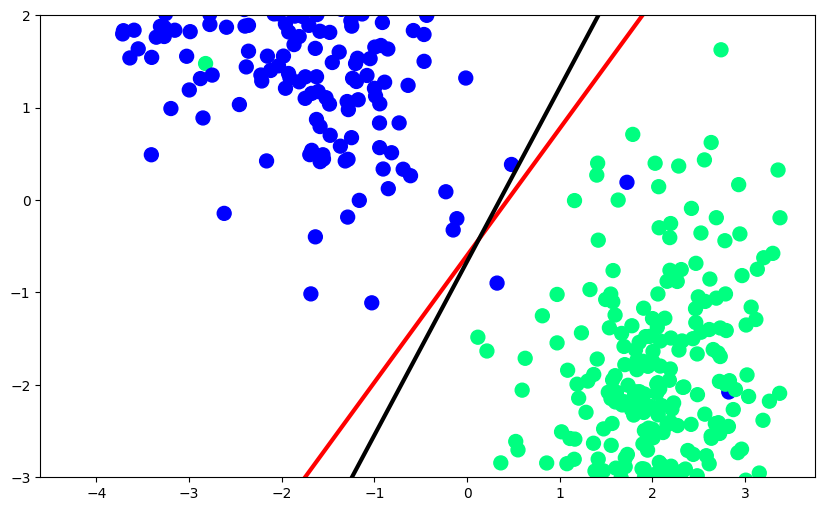

In [240]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:, 0], X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [241]:
intercept_, coef_ = perceptron(X, y)

print("Intercept:", intercept_)
print("Coefficients:", coef_)

Intercept: -0.29999999999999993
Coefficients: [ 0.34133222 -0.24930948]


#2 Again Using Perceptron Function

In [242]:
def perceptron(X,y):

  X=np.insert(X,0,1,axis=1)
  w=np.ones(X.shape[1])
  lr=0.1

  for i in range(1000):
    j=np.random.randint(0,100)
    y_hat=sigmoid(np.dot(w,X[j]))
    w=w + lr*(y[j]-y_hat)*X[j]
  return w[0],w[1:]

In [243]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [244]:
intercept_,coef=perceptron(X,y)

In [245]:
m=-(coef[0]/coef[1])
b=-(intercept_/coef[1])

In [246]:
X_input2=np.linspace(-3,3,100)
y_input2=m*X_input + b

(-3.0, 2.0)

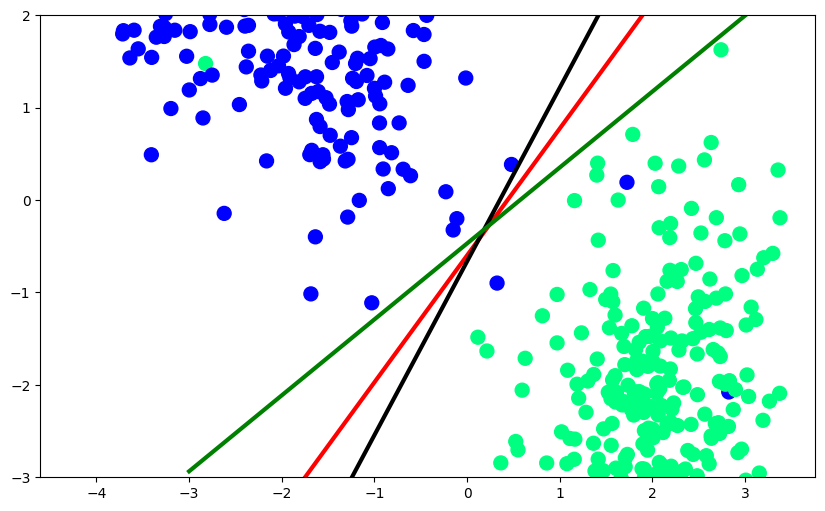

In [247]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(X_input2,y_input2,color='green',linewidth=3)
plt.scatter(X[:, 0], X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

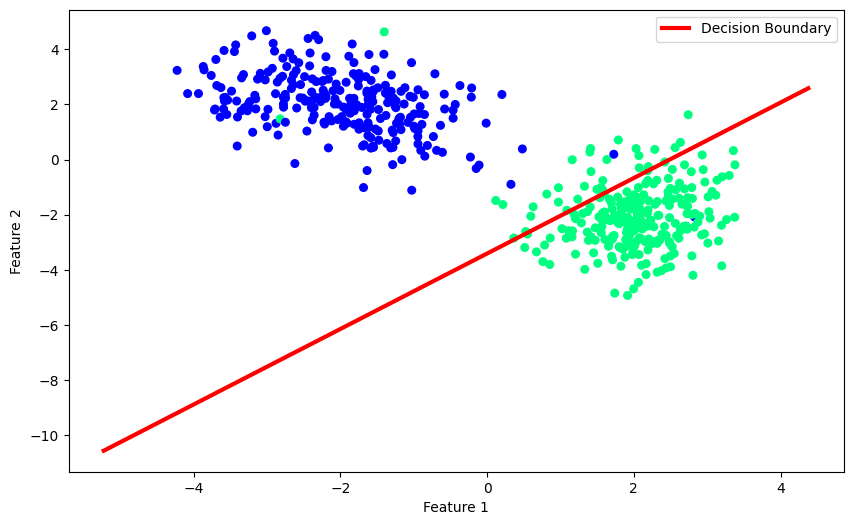

In [248]:
# Line equation: w0 + w1*x1 + w2*x2 = 0
# x2 = -(w1/w2)x1 - (w0/w2)

m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

# Use data range instead of fixed [-3,3]
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
X_input = np.linspace(x_min, x_max, 100)
y_input = m * X_input + b

plt.figure(figsize=(10, 6))
plt.plot(X_input, y_input, color='red', linewidth=3, label='Decision Boundary')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=30)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


#Using Sigmoid Function

In [249]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [250]:
def logistic_regression(X, y, epochs=1000, lr=0.1):

    # Add bias column
    X = np.insert(X, 0, 1, axis=1)

    # Initialize weights
    w = np.zeros(X.shape[1])

    n = X.shape[0]

    for i in range(epochs):

        # Random sample (SGD)
        j = np.random.randint(0, n)

        z = np.dot(w, X[j])
        y_hat = sigmoid(z)

        # Error = yi - y_hat
        error = y[j] - y_hat

        # Weight update
        w = w + lr * error * X[j]

    return w[0], w[1:]


In [251]:
intercept_, coef_ = logistic_regression(X, y)

print("Intercept:", intercept_)
print("Coefficients:", coef_)


Intercept: -0.4594106555904289
Coefficients: [ 1.40977196 -0.87016691]


In [252]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
X_input = np.linspace(x_min, x_max, 100)
y_input = m * X_input + b


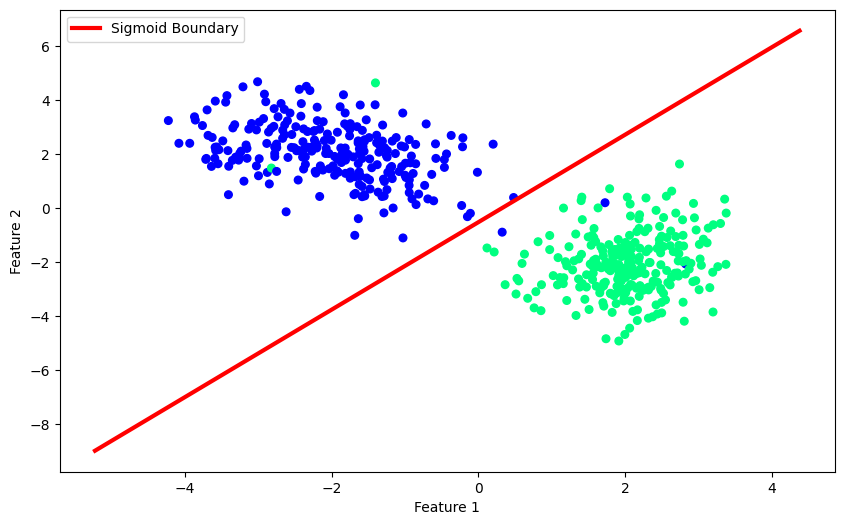

In [253]:
plt.figure(figsize=(10,6))
plt.plot(X_input, y_input, color='red', linewidth=3, label='Sigmoid Boundary')
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=30)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


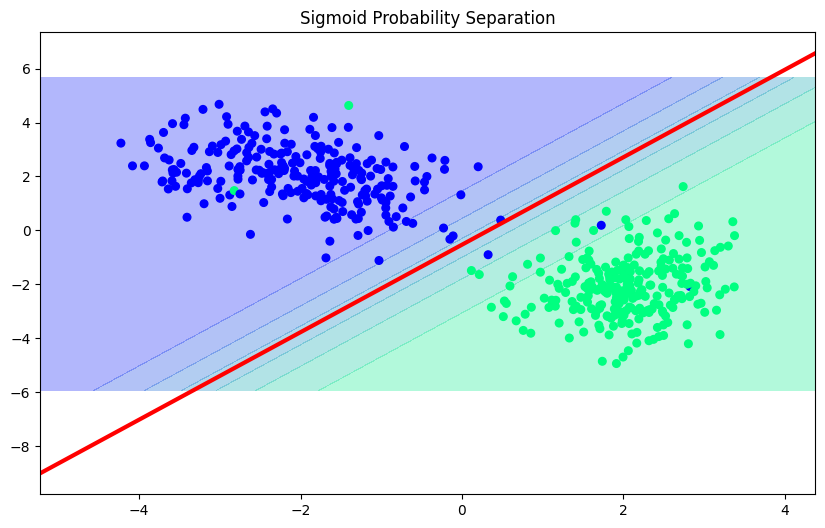

In [254]:
# Create grid
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100)
)

grid = np.c_[xx.ravel(), yy.ravel()]

# Add bias
grid_bias = np.insert(grid, 0, 1, axis=1)

# Probabilities
probs = sigmoid(np.dot(grid_bias, np.insert(coef_, 0, intercept_)))
probs = probs.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, probs, alpha=0.3, cmap='winter')
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=30)
plt.plot(X_input, y_input, color='red', linewidth=3)
plt.title("Sigmoid Probability Separation")
plt.show()
